In [19]:
%pylab inline
import time
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

import pypot.dynamixel
import pypot.robot
from explauto.environment import environments


my_config ={}
my_config['controllers'] = {}
my_config['controllers']['upper_body_controler'] = {
    'port': '/dev/ttyUSB0',     # For Linux
    #'port': '/dev/tty.usbserial-AI03QEN0', # For OSX
    'sync_read': False,
    'attached_motors': ['arms'],
    'protocol': 1,
}
my_config['motorgroups']={}
my_config['motorgroups'] = {
    'arms': ['right_arm'],
    'right_arm': ['r_shoulder_x', 'r_shoulder_y', 'r_arm_z','r_elbow_y']
}
my_config['motors'] = {}
my_config['motors']['r_shoulder_y'] = {
    'id': 51,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (-50, 170),
}
my_config['motors']['r_shoulder_x'] = {
    'id': 52,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (-90, 0),
}
my_config['motors']['r_arm_z'] = {
    'id': 53,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (-20, 95),
}
my_config['motors']['r_elbow_y'] = {
    'id': 54,
    'type': 'MX-28',
    'orientation': 'indirect',
    'offset': 0.0,
    'angle_limit': (0, 130),
}

poppy = pypot.robot.from_config(my_config)

poppy.start_sync()
time.sleep(2)

for m in poppy.motors:
    m.compliant = False
    m.goto_behavior = 'minjerk'
pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

Populating the interactive namespace from numpy and matplotlib


In [20]:
def rest_position():
    poppy.r_shoulder_y.goal_position = 0 #3 degrees is gravitational neutral
    poppy.r_shoulder_x.goal_position = 0
    poppy.r_arm_z.goal_position = 0
    poppy.r_elbow_y.goal_position = 0
    

In [21]:
def app():
    pos.append(poppy.r_shoulder_x.present_position)
    pos.append(poppy.r_shoulder_y.present_position)
    pos.append(poppy.r_arm_z.present_position)
    pos.append(poppy.r_elbow_y.present_position)

    sys_load.append(poppy.r_shoulder_x.present_load)
    sys_load.append(poppy.r_shoulder_y.present_load)
    sys_load.append(poppy.r_arm_z.present_load)
    sys_load.append(poppy.r_elbow_y.present_load)
    
    speed.append(poppy.r_shoulder_x.present_speed)
    speed.append(poppy.r_shoulder_y.present_speed)
    speed.append(poppy.r_arm_z.present_speed)
    speed.append(poppy.r_elbow_y.present_speed)
    
    temp.append(poppy.r_shoulder_x.present_temperature)
    temp.append(poppy.r_shoulder_y.present_temperature)
    temp.append(poppy.r_arm_z.present_temperature)
    temp.append(poppy.r_elbow_y.present_temperature)
     
    volt.append(poppy.r_shoulder_x.present_voltage)
    volt.append(poppy.r_shoulder_y.present_voltage)
    volt.append(poppy.r_arm_z.present_voltage)
    volt.append(poppy.r_elbow_y.present_voltage)

In [22]:
def hand_wave(sec=10, rest=0.5):
    t0 = time.time()
    while True:
        
        if t1-t0 >= sec:
            break

        # run for sec
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 0
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -90  
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 30;
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 1
        
        app()
        TIME.append(t1-t0)
        time.sleep(rest)
        
    
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 0
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -90
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 30
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 30
        
        app()
        TIME.append(t1-t0)

        time.sleep(rest)
        app()
        TIME.append(t1-t0)

In [23]:
def hand_shake(sec=3, rest=0.5):

    t0 = time.time()
    
    while True:
        
        t1 = time.time()
        if t1-t0 >= sec:
            break 
        
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = 35
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = -135
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = 90
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 25
        time.sleep(rest-.01)
        
        app()
        poppy.r_shoulder_y.goal_position = 50
        TIME.append(t1-t0)
        time.sleep(rest+0.1)
        
        

In [24]:
def rattle_shake(sec=10, rest=0.42, spd=10):
    t0 = time.time()
    while True:
        
        
        t1 = time.time()
        if t1-t0 >= sec:
            break

        # run for sec
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = -25 #-25
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = 0  #0
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 0; #0
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = -10 #-10
        
        app()
        TIME.append(t1-t0)
        time.sleep(rest)
        
    
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_y.goal_position = -45 #-45
        app()
        TIME.append(t1-t0)
        poppy.r_shoulder_x.goal_position = 5 #5
        app()
        TIME.append(t1-t0)
        poppy.r_arm_z.goal_position = 20 #20
        app()
        TIME.append(t1-t0)
        poppy.r_elbow_y.goal_position = -65 #-65
        
        app()
        TIME.append(t1-t0)

        time.sleep(rest)
        app()
        TIME.append(t1-t0)

In [25]:
#This script is used to move the poppy arm into anatomical poses.
#Pictures will be edited for an anatomical reference.
def anatomical(rest=3):
        time.sleep(rest)
#Lateral View Pictures
#Figure 1
    #Motor 51 Shoulder Flexion
        poppy.r_shoulder_y.goal_position = 49 
        time.sleep(rest)
        #Rest Position
        rest_position()
    #Motor 51 Shoulder Extension
        poppy.r_shoulder_y.goal_position = -169 
        time.sleep(rest)
        #Rest Position
        rest_position()
#Figure 2
    #Motor 54 Elbow Extension
        poppy.r_elbow_y.goal_position = 0 
        time.sleep(rest)
        #Rest Position
        rest_position()
    #Motor 54 Elbow Flexion
        poppy.r_elbow_y.goal_position = -129
        time.sleep(rest)
        #Rest Position
        rest_position()
            
#Anterior View Pictures
#Figure 3
    #Motor 53 Pronation
        poppy.r_arm_z.goal_position = -20 
        time.sleep(rest)
        #Rest Position
        rest_position()
    #Motor 53 Supination
        poppy.r_arm_z.goal_position = 94 
        time.sleep(rest)
        #Rest Position
        rest_position()
#Figure 4       
    #Motor 52 Adduction
        poppy.r_shoulder_x.goal_position = 0
        time.sleep(rest)
        #Rest Position
        rest_position()
    #Motor 52 Abduction    
        poppy.r_shoulder_x.goal_position = 89
        time.sleep(rest)
        #Rest Position
        rest_position()



In [28]:
for x in poppy.arms:
    print x

<DxlMotor name=r_shoulder_x id=52 pos=0.04>
<DxlMotor name=r_shoulder_y id=51 pos=-0.31>
<DxlMotor name=r_arm_z id=53 pos=0.13>
<DxlMotor name=r_elbow_y id=54 pos=-0.04>


In [27]:
rest_position()

In [12]:
# reset arrays
pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []

In [16]:
rattle_shake()
time.sleep(0.25)
rest_position()

In [17]:
anatomical()
time.sleep(0.25)
rest_position()

In [10]:
hand_wave()
time.sleep(0.25)
rest_position()

In [11]:
hand_shake()
time.sleep(0.25)
rest_position()

In [12]:
print len(pos)
print len(TIME)
print pos_Arr.size
print TIME_Arr.size
print speed_Arr[:,0].size

500
125


NameError: name 'pos_Arr' is not defined

In [13]:
# formatting into arrays
pos_Arr = np.asarray(pos)
sys_load_Arr = np.asarray(sys_load)
speed_Arr = np.asarray(speed)
temp_Arr = np.asarray(temp)
volt_Arr = np.asarray(volt)
TIME_Arr = np.asarray(TIME)

pos_Arr = pos_Arr.reshape((pos_Arr.size / 4,4))
sys_load_Arr = sys_load_Arr.reshape((sys_load_Arr.size / 4,4))
speed_Arr = speed_Arr.reshape((speed_Arr.size / 4,4))
temp_Arr = temp_Arr.reshape((temp_Arr.size / 4,4))
volt_Arr = volt_Arr.reshape((volt_Arr.size / 4, 4))

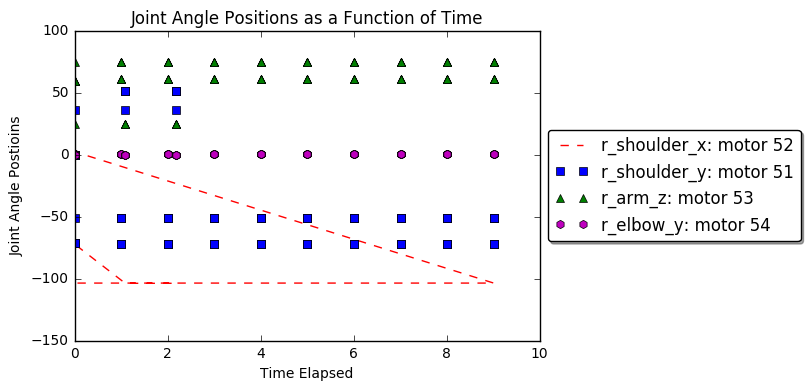

In [14]:
# Joint Angle Positions as a Function of Time

plt.plot(TIME_Arr,pos_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,pos_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,pos_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,pos_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Angle Positions as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Angle Postioins')


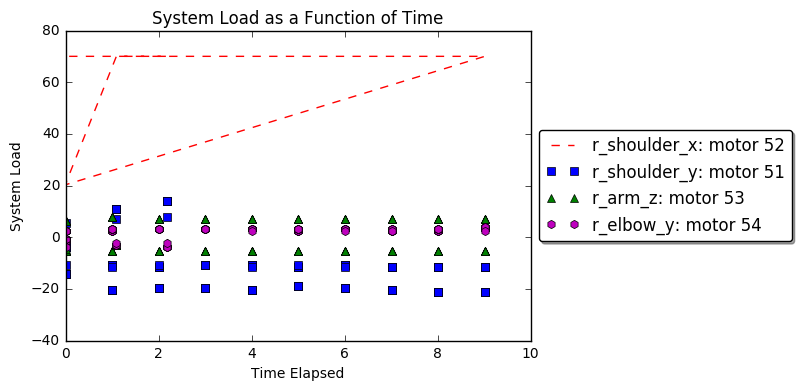

In [15]:
# System Load as a Function of Time

plt.plot(TIME_Arr,sys_load_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,sys_load_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,sys_load_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,sys_load_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('System Load as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('System Load')

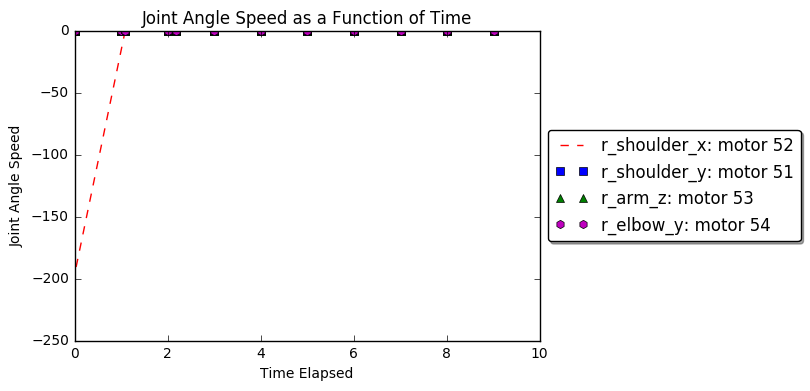

In [16]:
# Joint Angle Speed as a Function of Time

plt.plot(TIME_Arr,speed_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,speed_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,speed_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,speed_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Angle Speed as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Angle Speed')


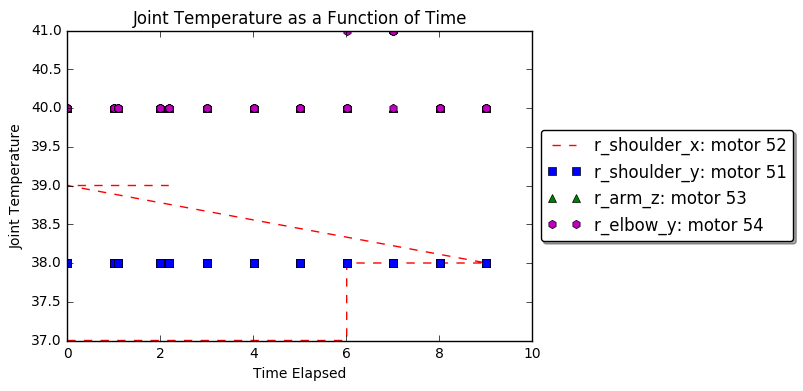

In [17]:
# Joint Temperature as a Function of Time

plt.plot(TIME_Arr,temp_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,temp_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,temp_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,temp_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Temperature as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Temperature')


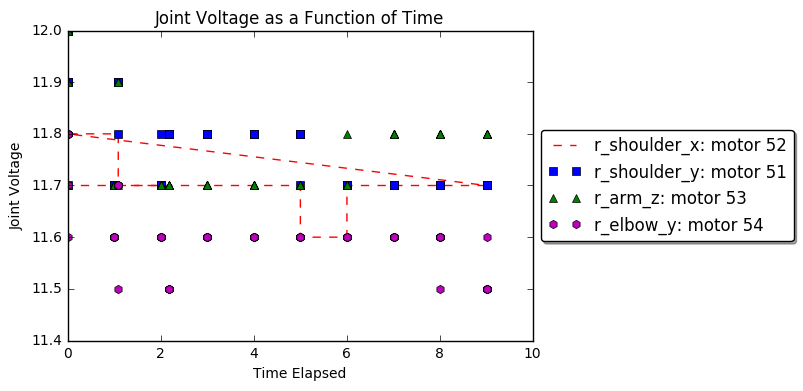

In [18]:
# Joint Voltage as a Function of Time

plt.plot(TIME_Arr,volt_Arr[:,0],'r--',label='r_shoulder_x: motor 52')
plt.plot(TIME_Arr,volt_Arr[:,1],'bs',label='r_shoulder_y: motor 51')
plt.plot(TIME_Arr,volt_Arr[:,2],'g^',label='r_arm_z: motor 53')
plt.plot(TIME_Arr,volt_Arr[:,3],'mh',label='r_elbow_y: motor 54')

plt.legend(shadow=True, fancybox=True,loc='center left',bbox_to_anchor=(1, 0.5))
plt.title('Joint Voltage as a Function of Time')
pylab.xlabel('Time Elapsed')
pylab.ylabel('Joint Voltage')



In [29]:
# RUN at the end of working
pos = []
TIME = []
sys_load = []
speed = []
temp = []
volt = []
for m in poppy.motors:
    m.compliant = True
time.sleep(1)
poppy.stop_sync()
poppy.close()